In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats= np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs= np.random.uniform(low=-180.000, high=180.000, size=1500)
lats_lngs= zip(lats,lngs)
lats_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lats_lngs)

In [4]:
coordinates

[(23.382069178637607, -170.3835516429553),
 (46.75269154757754, -172.8609442816286),
 (40.10008679170241, -88.5666396497624),
 (-74.75299883831133, -3.032712992483681),
 (10.599811247536962, -111.51068029412042),
 (-64.2408846178321, 24.11390791295574),
 (14.484792149670284, 99.51191367467686),
 (11.199814927261016, 131.21407073750026),
 (-24.331833761165015, -51.10687461023895),
 (-44.70482869483549, 147.75633640730888),
 (49.35139246778968, 130.46940354898499),
 (-7.807163948090064, 36.128289299688646),
 (9.802618812652582, -152.02108326307564),
 (-49.3822852305089, 3.413458581174126),
 (-77.87567328779961, -47.965251066454954),
 (-82.64099818697889, -86.9237772285607),
 (-11.026021708723647, 81.17020908542867),
 (-74.95837119031594, -10.600650053853713),
 (66.4804923801839, -154.9415553801962),
 (37.60890977997535, -22.813375586534136),
 (-15.701924560404834, -161.9647991495145),
 (-37.730959153043045, 54.71324359758907),
 (54.90501200817792, 29.84955128938566),
 (3.214173299453577,

In [5]:
coordinates[0:10]

[(23.382069178637607, -170.3835516429553),
 (46.75269154757754, -172.8609442816286),
 (40.10008679170241, -88.5666396497624),
 (-74.75299883831133, -3.032712992483681),
 (10.599811247536962, -111.51068029412042),
 (-64.2408846178321, 24.11390791295574),
 (14.484792149670284, 99.51191367467686),
 (11.199814927261016, 131.21407073750026),
 (-24.331833761165015, -51.10687461023895),
 (-44.70482869483549, 147.75633640730888)]

In [6]:
coordinates

[(23.382069178637607, -170.3835516429553),
 (46.75269154757754, -172.8609442816286),
 (40.10008679170241, -88.5666396497624),
 (-74.75299883831133, -3.032712992483681),
 (10.599811247536962, -111.51068029412042),
 (-64.2408846178321, 24.11390791295574),
 (14.484792149670284, 99.51191367467686),
 (11.199814927261016, 131.21407073750026),
 (-24.331833761165015, -51.10687461023895),
 (-44.70482869483549, 147.75633640730888),
 (49.35139246778968, 130.46940354898499),
 (-7.807163948090064, 36.128289299688646),
 (9.802618812652582, -152.02108326307564),
 (-49.3822852305089, 3.413458581174126),
 (-77.87567328779961, -47.965251066454954),
 (-82.64099818697889, -86.9237772285607),
 (-11.026021708723647, 81.17020908542867),
 (-74.95837119031594, -10.600650053853713),
 (66.4804923801839, -154.9415553801962),
 (37.60890977997535, -22.813375586534136),
 (-15.701924560404834, -161.9647991495145),
 (-37.730959153043045, 54.71324359758907),
 (54.90501200817792, 29.84955128938566),
 (3.214173299453577,

In [7]:
cities=[]
for coordinate in coordinates:
    city= citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    if city not in cities:
        cities.append(city)
        
len(cities)

602

In [8]:
cities

['kapaa',
 'provideniya',
 'champaign',
 'hermanus',
 'san patricio',
 'bredasdorp',
 'bo phloi',
 'meyungs',
 'ortigueira',
 'hobart',
 'arkhara',
 'ilula',
 'hilo',
 'cape town',
 'ushuaia',
 'hithadhoo',
 'barrow',
 'vila franca do campo',
 'avarua',
 'taolanaro',
 'senno',
 'grand-santi',
 'narsaq',
 'balkhash',
 'tocopilla',
 'san juan',
 'batagay-alyta',
 'praia',
 'powell river',
 'olafsvik',
 'qaanaaq',
 'dikson',
 'carnarvon',
 'leningradskiy',
 'norman wells',
 'boshnyakovo',
 'sochi',
 'albany',
 'esperance',
 'bambous virieux',
 'new norfolk',
 'puerto ayora',
 'port alfred',
 'fairbanks',
 'palabuhanratu',
 'nanortalik',
 'tiksi',
 'nome',
 'lorengau',
 'kamenka',
 'korla',
 'bluff',
 'onega',
 'ahipara',
 'lebu',
 'gavrilovka vtoraya',
 'kilindoni',
 'beringovskiy',
 'arraial do cabo',
 'tsihombe',
 'belushya guba',
 'upernavik',
 'tuktoyaktuk',
 'chuy',
 'mount gambier',
 'airai',
 'mataura',
 'vaini',
 'xam nua',
 'cidreira',
 'banda aceh',
 'deqing',
 'okandja',
 'riki

In [ ]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
city_data=[]
print("Beginning Data Retrieval     ")
print("-----------------------------")

record_count = 1
set_count= 1

for i, city in enumerate(cities):
    
     # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i>= 50):
        set_count+=1
        record_count = 1
        time.sleep(60)
    # Create endpoint URL with each city.
    city_url= url+ "&q="+ city.replace(" ", "+")
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | provideniya
Processing Record 3 of Set 1 | champaign
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | san patricio
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | bo phloi
Processing Record 8 of Set 1 | meyungs
City not found. Skipping...
Processing Record 9 of Set 1 | ortigueira
Processing Record 10 of Set 1 | hobart
Processing Record 11 of Set 1 | arkhara
Processing Record 12 of Set 1 | ilula
Processing Record 13 of Set 1 | hilo
Processing Record 14 of Set 1 | cape town
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | hithadhoo
Processing Record 17 of Set 1 | barrow
Processing Record 18 of Set 1 | vila franca do campo
Processing Record 19 of Set 1 | avarua
Processing Record 20 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 21 of Set 1 | senno
Processing Record 22 of Set

Processing Record 36 of Set 4 | ribas do rio pardo
Processing Record 37 of Set 4 | adrar
Processing Record 38 of Set 4 | artvin
Processing Record 39 of Set 4 | kharan
Processing Record 40 of Set 4 | yerbogachen
Processing Record 41 of Set 4 | sanary-sur-mer
Processing Record 42 of Set 4 | tottori
Processing Record 43 of Set 4 | sinnamary
Processing Record 44 of Set 4 | longyearbyen
Processing Record 45 of Set 4 | san antonio
Processing Record 46 of Set 4 | sampit
Processing Record 47 of Set 4 | victoria
Processing Record 48 of Set 4 | jabiru
City not found. Skipping...
Processing Record 49 of Set 4 | bandarbeyla
Processing Record 50 of Set 4 | naze
Processing Record 1 of Set 5 | dzhusaly
City not found. Skipping...
Processing Record 2 of Set 5 | ranfurly
Processing Record 3 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 4 of Set 5 | bawku
Processing Record 5 of Set 5 | semnan
Processing Record 6 of Set 5 | maniitsoq
Processing Record 7 of Set 5 | lagoa
Processing 

Processing Record 24 of Set 8 | talara
Processing Record 25 of Set 8 | istok
Processing Record 26 of Set 8 | black forest
Processing Record 27 of Set 8 | berlevag
Processing Record 28 of Set 8 | brae
Processing Record 29 of Set 8 | ewa beach
Processing Record 30 of Set 8 | sao jose da coroa grande
Processing Record 31 of Set 8 | saint-prosper
Processing Record 32 of Set 8 | resavica
Processing Record 33 of Set 8 | cabrera
Processing Record 34 of Set 8 | astana
Processing Record 35 of Set 8 | grand gaube
Processing Record 36 of Set 8 | ancud
Processing Record 37 of Set 8 | halifax
Processing Record 38 of Set 8 | ngukurr
City not found. Skipping...
Processing Record 39 of Set 8 | djambala
Processing Record 40 of Set 8 | jiaojiang
Processing Record 41 of Set 8 | suntar
Processing Record 42 of Set 8 | san quintin
Processing Record 43 of Set 8 | hambantota
Processing Record 44 of Set 8 | dalbandin
Processing Record 45 of Set 8 | aklavik
Processing Record 46 of Set 8 | waitati
Processing Rec

Processing Record 12 of Set 12 | deputatskiy
Processing Record 13 of Set 12 | hoima
Processing Record 14 of Set 12 | xudat
Processing Record 15 of Set 12 | sassandra
Processing Record 16 of Set 12 | espita
Processing Record 17 of Set 12 | beyneu
Processing Record 18 of Set 12 | zlatoustovsk
City not found. Skipping...
Processing Record 19 of Set 12 | paita
Processing Record 20 of Set 12 | nagato
Processing Record 21 of Set 12 | omboue
Processing Record 22 of Set 12 | cap malheureux
Processing Record 23 of Set 12 | rabo de peixe
Processing Record 24 of Set 12 | lasa
Processing Record 25 of Set 12 | nalhati
Processing Record 26 of Set 12 | buala
Processing Record 27 of Set 12 | ilulissat
Processing Record 28 of Set 12 | lanzhou
Processing Record 29 of Set 12 | san andres
Processing Record 30 of Set 12 | karratha
Processing Record 31 of Set 12 | henties bay
Processing Record 32 of Set 12 | valkeakoski
Processing Record 33 of Set 12 | ust-kut
Processing Record 34 of Set 12 | gwembe
Process

In [11]:
len(city_data)

551

In [12]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.0752,-159.3190,79.48,71,20,1.99,US,2022-01-24 00:43:04
1,Provideniya,64.3833,-173.3000,14.11,79,100,8.95,RU,2022-01-24 00:43:04
2,Champaign,40.1334,-88.2001,22.71,67,0,1.01,US,2022-01-24 00:43:05
3,Hermanus,-34.4187,19.2345,67.89,91,97,6.91,ZA,2022-01-24 00:43:05
4,San Patricio,28.0170,-97.5169,57.88,47,100,3.36,US,2022-01-24 00:43:06
5,Bredasdorp,-34.5322,20.0403,66.27,88,28,8.93,ZA,2022-01-24 00:43:06
6,Bo Phloi,14.3236,99.5161,76.32,69,50,3.20,TH,2022-01-24 00:43:06
7,Ortigueira,-24.2083,-50.9494,66.67,99,100,1.03,BR,2022-01-24 00:43:07
8,Hobart,-42.8794,147.3294,79.27,65,100,10.36,AU,2022-01-24 00:40:02
9,Arkhara,49.4212,130.0842,-14.06,100,100,1.95,RU,2022-01-24 00:43:07


In [13]:
new_column_order= ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df= city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,2022-01-24 00:43:04,22.0752,-159.3190,79.48,71,20,1.99
1,Provideniya,RU,2022-01-24 00:43:04,64.3833,-173.3000,14.11,79,100,8.95
2,Champaign,US,2022-01-24 00:43:05,40.1334,-88.2001,22.71,67,0,1.01
3,Hermanus,ZA,2022-01-24 00:43:05,-34.4187,19.2345,67.89,91,97,6.91
4,San Patricio,US,2022-01-24 00:43:06,28.0170,-97.5169,57.88,47,100,3.36
...,...,...,...,...,...,...,...,...,...
546,Andros Town,BS,2022-01-24 00:57:09,24.7000,-77.7667,71.56,80,30,11.86
547,Salmon Arm,CA,2022-01-24 00:52:40,50.6998,-119.3024,32.31,89,100,1.14
548,Salur,IN,2022-01-24 00:57:10,18.5333,83.2167,67.86,70,31,1.86
549,Richards Bay,ZA,2022-01-24 00:58:10,-28.7830,32.0377,67.14,88,21,5.32


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label= "City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps= city_data_df["Max Temp"]
humidity= city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [18]:
import time

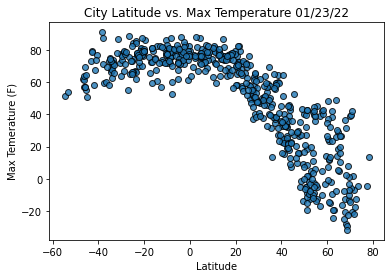

In [37]:
plt.scatter(lats, max_temps, 
           edgecolor= "black",
           linewidth=1,
           marker="o",
           alpha=0.8,
           label= "Cities")
plt.title(f"City Latitude vs. Max Temperature " +time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temerature (F)")
plt.savefig("weather_data/Fig1.png")
plt.show()

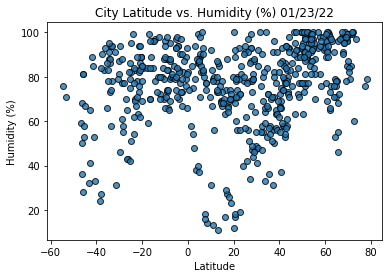

In [44]:
plt.scatter(lats, humidity, 
           edgecolor= "black",
           linewidth=1,
           marker="o",
           alpha=0.8,
           label= "Cities")
plt.title(f"City Latitude vs. Humidity (%) " +time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("weather_data/Fig2.png")
plt.show()

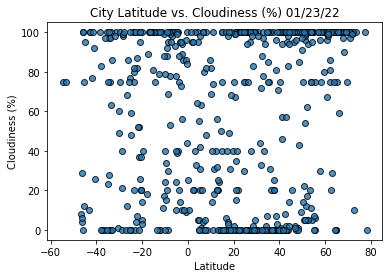

In [45]:
plt.scatter(lats, cloudiness, 
           edgecolor= "black",
           linewidth=1,
           marker="o",
           alpha=0.8,
           label= "Cities")
plt.title(f"City Latitude vs. Cloudiness (%) " +time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("weather_data/Fig3.png")
plt.show()

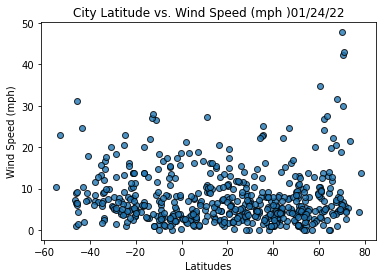

In [47]:
plt.scatter(lats, wind_speed, 
           edgecolor= "black",
           linewidth=1,
           marker="o",
           alpha=0.8,
           label= "Cities")
plt.title(f"City Latitude vs. Wind Speed (mph )" +time.strftime("%x"))
plt.xlabel("Latitudes")
plt.ylabel("Wind Speed (mph)")
plt.savefig("weather_data/Fig4.png")
plt.show()

In [66]:
from scipy.stats import linregress
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [67]:
index13= city_data_df.loc[13]
index13

City                      Ushuaia
Country                        AR
Date          2022-01-24 00:43:08
Lat                         -54.8
Lng                         -68.3
Max Temp                    51.46
Humidity                       76
Cloudiness                     75
Wind Speed                  10.36
Name: 13, dtype: object

In [68]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3      False
4       True
       ...  
546     True
547     True
548     True
549    False
550     True
Name: Lat, Length: 551, dtype: bool

In [69]:
northern_hemi_df= city_data_df.loc[(city_data_df["Lat"] >= 0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,2022-01-24 00:43:04,22.0752,-159.3190,79.48,71,20,1.99
1,Provideniya,RU,2022-01-24 00:43:04,64.3833,-173.3000,14.11,79,100,8.95
2,Champaign,US,2022-01-24 00:43:05,40.1334,-88.2001,22.71,67,0,1.01
4,San Patricio,US,2022-01-24 00:43:06,28.0170,-97.5169,57.88,47,100,3.36
6,Bo Phloi,TH,2022-01-24 00:43:06,14.3236,99.5161,76.32,69,50,3.20


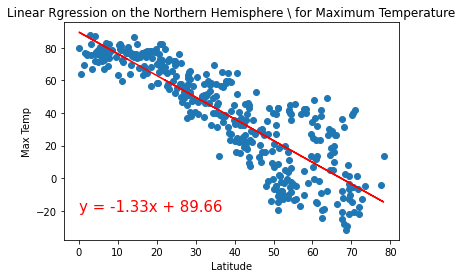

In [72]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
#call the function
plot_linear_regression(x_values, y_values, 'Linear Rgression on the Northern Hemisphere \ for Maximum Temperature', 'Max Temp', (0,-20))


In [73]:
southern_hemi_df= city_data_df.loc[(city_data_df["Lat"] <= 0)]
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Hermanus,ZA,2022-01-24 00:43:05,-34.4187,19.2345,67.89,91,97,6.91
5,Bredasdorp,ZA,2022-01-24 00:43:06,-34.5322,20.0403,66.27,88,28,8.93
7,Ortigueira,BR,2022-01-24 00:43:07,-24.2083,-50.9494,66.67,99,100,1.03
8,Hobart,AU,2022-01-24 00:40:02,-42.8794,147.3294,79.27,65,100,10.36
10,Ilula,TZ,2022-01-24 00:43:07,-7.6766,36.0366,60.30,95,100,3.09


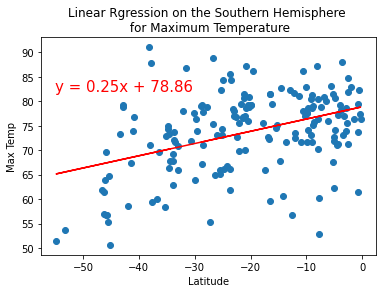

In [82]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
#call the function
plot_linear_regression(x_values, y_values, 'Linear Rgression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp', (-55, 82))


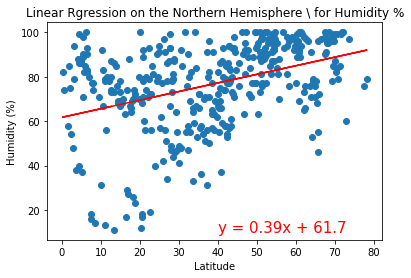

In [83]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
#call the function
plot_linear_regression(x_values, y_values, 'Linear Rgression on the Northern Hemisphere \ for Humidity %', 'Humidity (%)', (40,10))


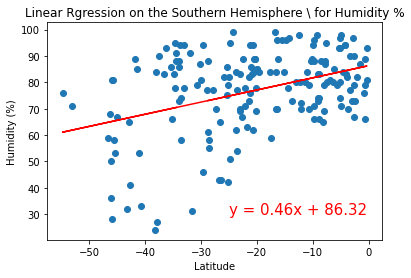

In [87]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
#call the function
plot_linear_regression(x_values, y_values, 'Linear Rgression on the Southern Hemisphere \ for Humidity %', 'Humidity (%)', (-25,30))


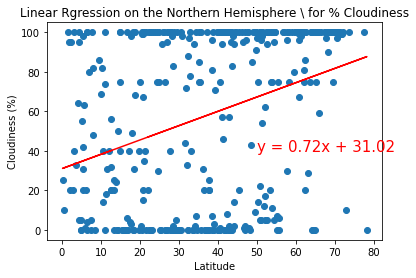

In [90]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
#call the function
plot_linear_regression(x_values, y_values, 'Linear Rgression on the Northern Hemisphere \ for % Cloudiness', 'Cloudiness (%)', (50,40))


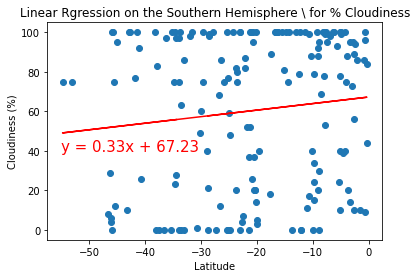

In [95]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
#call the function
plot_linear_regression(x_values, y_values, 'Linear Rgression on the Southern Hemisphere \ for % Cloudiness', 'Cloudiness (%)', (-55,40))


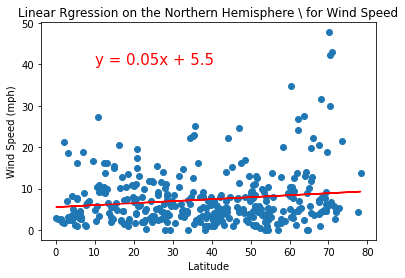

In [97]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
#call the function
plot_linear_regression(x_values, y_values, 'Linear Rgression on the Northern Hemisphere \ for Wind Speed', 'Wind Speed (mph)', (10,40))


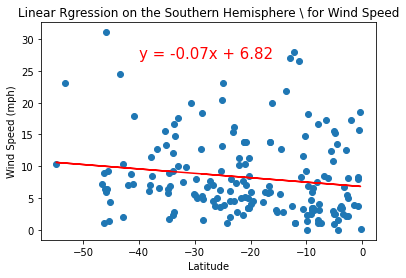

In [99]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
#call the function
plot_linear_regression(x_values, y_values, 'Linear Rgression on the Southern Hemisphere \ for Wind Speed', 'Wind Speed (mph)', (-40,27))